Optimal bandit index: 2
True optimal bandit index: 2
Mean estimates for each bandit: [0.19901719901719903, 0.5406976744186047, 0.7500270299491835]
Total reward earned: 7204.0
Overall win rate: 0.7204
Number of times explored: 1038
Number of times exploited: 8962
Number of times selected true optimal bandit: 9249
Number of times selected each bandit: [407, 344, 9249]


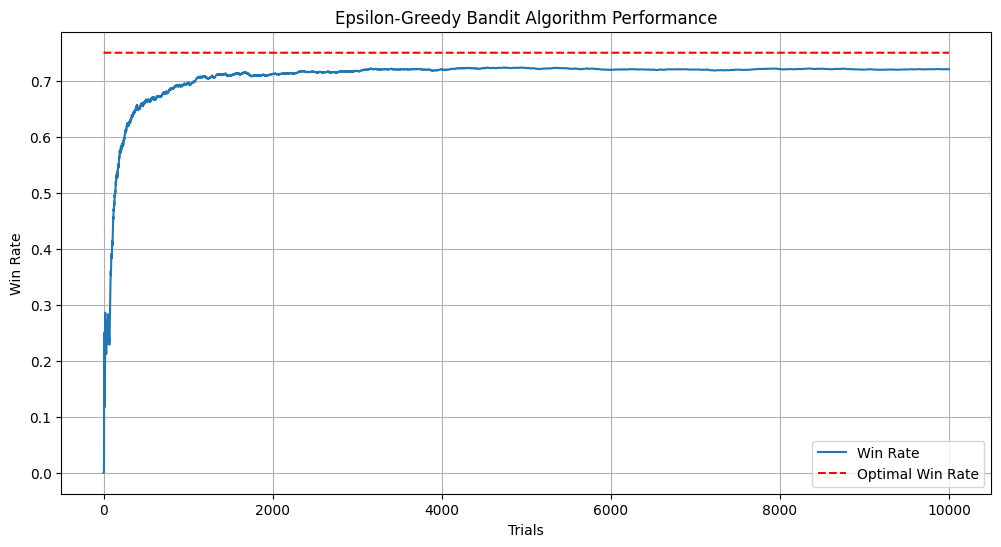

In [1]:
import matplotlib.pyplot as plt
import numpy as np


class Bandit:
    def __init__(self, p):
        """
        Initialize a bandit with a given win probability 'p'.
        Attributes:
        - p: The true probability of winning (unknown to the agent).
        - p_estimate: The agent's current estimate of this probability.
        - N: Number of trials
        """
        self.p = p
        self.p_estimate = 0.0  # Start with an initial estimate of 0.
        self.N = 0  # Num of samples collected so far. Start with an initial value of 0.

    def pull(self):
        """
        Simulates pulling the bandit's arm.
        Returns 1 (win) with probability 'p', and 0 (loss) otherwise.
        """
        return np.random.random() < self.p  # Random number in [0,1], true if less than p

    def update(self, x):
        """
        Updates the agent's estimate of the bandit's win rate.
        Formula used:
        p_estimate = ((total_trials-1) * current_p_estimate + current_reward) / total_trials
        """
        self.N += 1.0  # Increment the number of samples collected
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N


def epsilon_greedy(bandit_probabilities, num_trials, epsilon=0.1):
    """
    Runs the epsilon-greedy algorithm to learn the best bandit over a number of trials.
    Parameters:
    - bandit_probabilities: The true win probabilities of the bandits.
    - num_trials: The total number of trials (or pulls).
    - epsilon: The exploration rate; probability of choosing a random bandit instead of the best-known one.
    """
    bandits = [Bandit(p) for p in bandit_probabilities]  # Initialize bandits with true probabilities

    rewards = np.zeros(num_trials)  # Array to store rewards for each trial
    num_times_explored = 0  # Count how often we explore (choose randomly)
    num_times_exploited = 0  # Count how often we exploit (choose the best-known bandit)
    num_optimal = 0  # Track how often the best bandit is chosen
    optimal_j = np.argmax(bandit_probabilities)  # The index of the optimal (highest true probability) bandit

    for i in range(num_trials):
        # Epsilon-greedy action selection:
        # Explore (random choice) with probability epsilon
        if np.random.random() < epsilon:
            num_times_explored += 1
            j = np.random.randint(len(bandits))  # Choose a random bandit to explore
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])  # Choose the bandit with the highest estimated probability

        if j == optimal_j:
            num_optimal += 1  # Increment if we chose the true optimal bandit

        # Pull the selected bandit's arm
        x = bandits[j].pull()
        rewards[i] = x  # Store the reward for this trial (1 for win, 0 for loss)

        # Update the estimate of the bandit based on the result
        bandits[j].update(x)

    # Compute statistics for the experiment
    mean_estimates = [b.p_estimate for b in bandits]  # The final estimated probabilities for each bandit
    total_reward = rewards.sum()  # The total reward earned over all trials
    overall_win_rate = total_reward / num_trials  # The overall win rate (reward per trial)

    # Print out experiment results
    print("Optimal bandit index:", np.argmax(mean_estimates))
    print("True optimal bandit index:", optimal_j)
    print("Mean estimates for each bandit:", mean_estimates)
    print("Total reward earned:", total_reward)
    print("Overall win rate:", overall_win_rate)
    print("Number of times explored:", num_times_explored)
    print("Number of times exploited:", num_times_exploited)
    print("Number of times selected true optimal bandit:", num_optimal)
    print("Number of times selected each bandit:", [int(b.N) for b in bandits])

    # Plot the results for visualization
    plot_results(rewards, bandit_probabilities, num_trials)


def plot_results(rewards, bandit_probabilities, num_trials):
    """
    Plots the win rates over time and the optimal win rate for comparison.
    Parameters:
    - rewards: The rewards obtained during the experiment.
    - bandit_probabilities: The true win probabilities of the bandits.
    - num_trials: The total number of trials (or pulls).
    """
    cumulative_rewards = np.cumsum(rewards)  # Cumulative sum of rewards at each trial
    win_rates = cumulative_rewards / (np.arange(num_trials) + 1)  # Win rate at each point in time

    plt.figure(figsize=(12, 6))
    plt.plot(win_rates, label='Win Rate')  # Plot the computed win rate
    plt.plot(np.ones(num_trials) * np.max(bandit_probabilities),
             linestyle='--', color='red', label='Optimal Win Rate')  # Plot the best possible win rate
    plt.xlabel('Trials')
    plt.ylabel('Win Rate')
    plt.title('Epsilon-Greedy Bandit Algorithm Performance')
    plt.legend(loc=4)
    plt.grid()
    plt.show()


if __name__ == "__main__":
    BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]  # The true probabilities of each bandit
    NUM_TRIALS = 10000  # Number of trials to simulate
    EPS = 0.1  # Epsilon value for exploration
    epsilon_greedy(BANDIT_PROBABILITIES, NUM_TRIALS, EPS)